# Incidence de la varicelle

Le travail présenté ici est fortement inspiré du travail déjà réalisé sur l'incidence du syndrôme grippale.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/france/fr/?page=table). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
# We try to get the dataset from local file and download it if it doesn't already exists
try:
    raw_data = pd.read_csv('incidence_varicelle.csv')
except FileNotFoundError:
    raw_data = pd.read_csv(data_url, skiprows=1)
    raw_data.to_csv('incidence_varicelle.csv')
raw_data

Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202340          7   3128     1412    4844       5   
1              1  202339          7   1717      611    2823       3   
2              2  202338          7   1663      274    3052       3   
3              3  202337          7   1122      223    2021       2   
4              4  202336          7    726       10    1442       1   
5              5  202335          7    961       96    1826       1   
6              6  202334          7   1168        9    2327       2   
7              7  202333          7   3308     1184    5432       5   
8              8  202332          7   7996     1120   14872      12   
9              9  202331          7   3318     1398    5238       5   
10            10  202330          7   5821     3269    8373       9   
11            11  202329          7  13558     8297   18819      20   
12            12  202328          7   6700     4043    9357      10   
13            13  202327          7   7253     4599    9907      11   
14            14  202326          7   9192     6223   12161      14   
15            15  202325          7  11498     8257   14739      17   
16            16  202324          7  11115     7968   14262      17   
17            17  202323          7  12563     6134   18992      19   
18            18  202322          7  12184     8125   16243      18   
19            19  202321          7  11349     7598   15100      17   
20            20  202320          7   9000     4615   13385      14   
21            21  202319          7   9344     6091   12597      14   
22            22  202318          7  10671     7291   14051      16   
23            23  202317          7   9184     6162   12206      14   
24            24  202316          7  11387     8014   14760      17   
25            25  202315          7  14040     7613   20467      21   
26            26  202314          7  15247    11032   19462      23   
27            27  202313          7  13322     9700   16944      20   
28            28  202312          7  10374     7218   13530      16   
29            29  202311          7   4919     2880    6958       7   
...          ...     ...        ...    ...      ...     ...     ...   
1684        1684  199126          7  17608    11304   23912      31   
1685        1685  199125          7  16169    10700   21638      28   
1686        1686  199124          7  16171    10071   22271      28   
1687        1687  199123          7  11947     7671   16223      21   
1688        1688  199122          7  15452     9953   20951      27   
1689        1689  199121          7  14903     8975   20831      26   
1690        1690  199120          7  19053    12742   25364      34   
1691        1691  199119          7  16739    11246   22232      29   
1692        1692  199118          7  21385    13882   28888      38   
1693        1693  199117          7  13462     8877   18047      24   
1694        1694  199116          7  14857    10068   19646      26   
1695        1695  199115          7  13975     9781   18169      25   
1696        1696  199114          7  12265     7684   16846      22   
1697        1697  199113          7   9567     6041   13093      17   
1698        1698  199112          7  10864     7331   14397      19   
1699        1699  199111          7  15574    11184   19964      27   
1700        1700  199110          7  16643    11372   21914      29   
1701        1701  199109          7  13741     8780   18702      24   
1702        1702  199108          7  13289     8813   17765      23   
1703        1703  199107          7  12337     8077   16597      22   
1704        1704  199106          7  10877     7013   14741      19   
1705        1705  199105          7  10442     6544   14340      18   
1706        1706  199104          7   7913     4563   11263      14   
1707        1707  199103          7  15387    10484   20290      27   
1708        1708  199102      

Y a-t-il des points manquants dans ce jeux de données ? Non, les données ont l'air correctes

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

We will work on a clean copy of our data, in case we modify thing

In [5]:
data = raw_data.copy()

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()
sorted_data

Unnamed: 0    week  indicator    inc  inc_low  inc_up  \
period                                                                         
1990-12-03/1990-12-09        1713  199049          7   1143        0    2610   
1990-12-10/1990-12-16        1712  199050          7  11079     6660   15498   
1990-12-17/1990-12-23        1711  199051          7  19080    13807   24353   
1990-12-24/1990-12-30        1710  199052          7  19375    13295   25455   
1990-12-31/1991-01-06        1709  199101          7  15565    10271   20859   
1991-01-07/1991-01-13        1708  199102          7  16277    11046   21508   
1991-01-14/1991-01-20        1707  199103          7  15387    10484   20290   
1991-01-21/1991-01-27        1706  199104          7   7913     4563   11263   
1991-01-28/1991-02-03        1705  199105          7  10442     6544   14340   
1991-02-04/1991-02-10        1704  199106          7  10877     7013   14741   
1991-02-11/1991-02-17        1703  199107          7  12337     8077   16597   
1991-02-18/1991-02-24        1702  199108          7  13289     8813   17765   
1991-02-25/1991-03-03        1701  199109          7  13741     8780   18702   
1991-03-04/1991-03-10        1700  199110          7  16643    11372   21914   
1991-03-11/1991-03-17        1699  199111          7  15574    11184   19964   
1991-03-18/1991-03-24        1698  199112          7  10864     7331   14397   
1991-03-25/1991-03-31        1697  199113          7   9567     6041   13093   
1991-04-01/1991-04-07        1696  199114          7  12265     7684   16846   
1991-04-08/1991-04-14        1695  199115          7  13975     9781   18169   
1991-04-15/1991-04-21        1694  199116          7  14857    10068   19646   
1991-04-22/1991-04-28        1693  199117          7  13462     8877   18047   
1991-04-29/1991-05-05        1692  199118          7  21385    13882   28888   
1991-05-06/1991-05-12        1691  199119          7  16739    11246   22232   
1991-05-13/1991-05-19        1690  199120          7  19053    12742   25364   
1991-05-20/1991-05-26        1689  199121          7  14903     8975   20831   
1991-05-27/1991-06-02        1688  199122          7  15452     9953   20951   
1991-06-03/1991-06-09        1687  199123          7  11947     7671   16223   
1991-06-10/1991-06-16        1686  199124          7  16171    10071   22271   
1991-06-17/1991-06-23        1685  199125          7  16169    10700   21638   
1991-06-24/1991-06-30        1684  199126          7  17608    11304   23912   
...                           ...     ...        ...    ...      ...     ...   
2023-03-13/2023-03-19          29  202311          7   4919     2880    6958   
2023-03-20/2023-03-26          28  202312          7  10374     7218   13530   
2023-03-27/2023-04-02          27  202313          7  13322     9700   16944   
2023-04-03/2023-04-09          26  202314          7  15247    11032   19462   
2023-04-10/2023-04-16          25  202315          7  14040     7613   20467   
2023-04-17/2023-04-23          24  202316          7  11387     8014   14760   
2023-04-24/2023-04-30          23  202317          7   9184     6162   12206   
2023-05-01/2023-05-07          22  202318          7  10671     7291   14051   
2023-05-08/2023-05-14          21  202319          7   9344     6091   12597   
2023-05-15/2023-05-21          20  202320          7   9000     4615   13385   
2023-05-22/2023-05-28          19  202321          7  11349     7598   15100   
2023-05-29/2023-06-04          18  202322          7  12184     8125   16243   
2023-06-05/2023-06-11          17  202323          7  12563     6134   18992   
2023-06-12/2023-06-18          16  202324          7  11115     7968   14262   
2023-06-19/2023-06-25          15  202325          7  11498     8257   14739   
2023-06-26/2023-07-02          14  202326          7   9192     6223   12161   
2023-07-03/2023-07-09          13  202327          7   7253     4599    9907   
2023-07-10/2023-07-16  

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

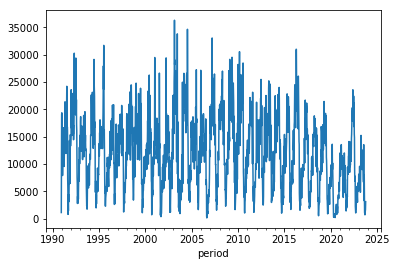

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics au printemps. Le creux des incidences se trouve en automne.

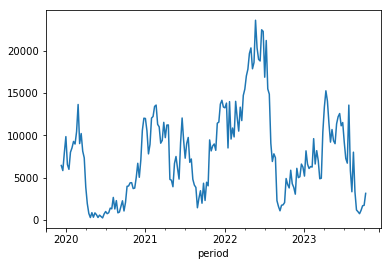

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle
Etant donné que le pic de l'épidémie se situe au printemps, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible fin été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en 1990 par une année incomplète. Nous commençons donc l'analyse en 1991.

In [11]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

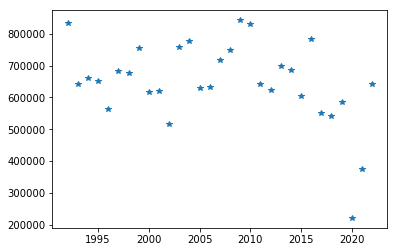

In [13]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies sont assez constantes en amplitudes, entre 500000 et 800000 cas par ans. Les années sortant de ces valeurs ne sont qu'au nombre de 2 depuis 1991.

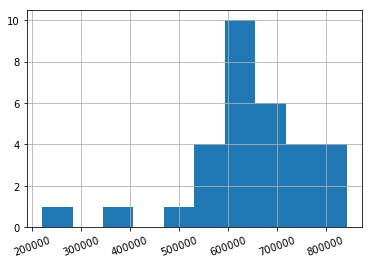

In [15]:
yearly_incidence.hist(xrot=20)